# Data Modelling for Surprise Housing

In [1517]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1518]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [1519]:
Housing_df=pd.read_csv(r"C:\Users\amanr\Downloads\Advanced Linear Regression\train.csv")

In [1520]:
# Check the head of the dataset
Housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1521]:
Housing_df.shape

(1460, 81)

In [1522]:
Housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1523]:
Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 1. Data Preparation

In [1524]:
#Identify null values
# adding up the missing values (column-wise)
nulls = Housing_df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index, row[0])

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSol

#### Managing null values
1.  column(s) that will get binary values: 'Street', 'Utilities', 'CentralAir'

2.  column(s) where null needs to be imputed as per Data Dictionary values: 'Alley' 'BsmtQual' 'BsmtFinType1' 'BsmtCond' 'BsmtExposure' 'BsmtFinType2' 'FireplaceQu' 'GarageFinish', 'GarageCond', 'GarageQual' 'PoolQC' 'Fence','MiscFeature'

3.  this is because for such columns NA has a value mapped in the Data dictonary

4.  column(s) where null rows need to be removed: 'Electrical' ,'MasVnrType' ,'MasVnrArea' ,'GarageYrBlt'

5.  column(s) where null is imputed with minimum value: 'LotFrontage'

In [1525]:
print(Housing_df['Street'].value_counts())
print(Housing_df['Utilities'].value_counts())
print(Housing_df['CentralAir'].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64


#### converting binary values to 0 and 1 

In [1526]:

# list of variables to map
varlist= ['Street']

 # Defining the map fuction
def binary_map(x):
    return x.map({'Pave':1,'Grvl':0})

 # Applying the function to the leadscore list
Housing_df[varlist]= Housing_df[varlist].apply(binary_map)

In [1527]:
varlist2= ['Utilities']

 # Defining the map fuction
def binary_map(x):
    return x.map({'AllPub':1,'NoSeWa':0})

 # Applying the function to the leadscore list
Housing_df[varlist2]= Housing_df[varlist2].apply(binary_map)

In [1528]:
varlist3= ['CentralAir']

 # Defining the map fuction
def binary_map(x):
    return x.map({'Y':1,'N':0})

 # Applying the function to the leadscore list
Housing_df[varlist3]= Housing_df[varlist3].apply(binary_map)
Housing_df['CentralAir'].value_counts()

1    1365
0      95
Name: CentralAir, dtype: int64

In [1529]:
Housing_df['Street'].value_counts()

1    1454
0       6
Name: Street, dtype: int64

In [1530]:
Housing_df['Utilities'].value_counts()

1    1459
0       1
Name: Utilities, dtype: int64

In [1531]:
#although 'Alley' also has binary values, most of its values are null and are classified as a legitimate value in data dictionary
Housing_df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

#### Imputing null values as per Data Dictionary values:

In [1532]:
Housing_df['Alley'].fillna("No Alley", inplace = True)
Housing_df['BsmtQual'].fillna("No Basement", inplace = True)
Housing_df['BsmtFinType1'].fillna("No Basement", inplace = True)
Housing_df['BsmtCond'].fillna("No Basement", inplace = True)
Housing_df['BsmtExposure'].fillna("No Basement", inplace = True)
Housing_df['BsmtFinType2'].fillna("No Basement", inplace = True)
Housing_df['FireplaceQu'].fillna("No Fireplace", inplace = True)
Housing_df['GarageFinish'].fillna("No Garage", inplace = True)
Housing_df['GarageQual'].fillna("No Garage", inplace = True)
Housing_df['GarageCond'].fillna("No Garage", inplace = True)
Housing_df['GarageType'].fillna("No Garage", inplace = True)
Housing_df['PoolQC'].fillna("No Pool", inplace = True)
Housing_df['Fence'].fillna("No Fence", inplace = True)
Housing_df['MiscFeature'].fillna("None", inplace = True)

In [1533]:
print(Housing_df['Alley'].value_counts(normalize=True))
print(Housing_df['BsmtQual'].value_counts(normalize=True))
print(Housing_df['BsmtFinType1'].value_counts(normalize=True))
print(Housing_df['BsmtCond'].value_counts(normalize=True))
print(Housing_df['BsmtExposure'].value_counts(normalize=True))
print(Housing_df['BsmtFinType2'].value_counts(normalize=True))
print(Housing_df['FireplaceQu'].value_counts(normalize=True))
print(Housing_df['GarageFinish'].value_counts(normalize=True))
print(Housing_df['GarageCond'].value_counts(normalize=True))
print(Housing_df['PoolQC'].value_counts(normalize=True))
print(Housing_df['Fence'].value_counts(normalize=True))
print(Housing_df['MiscFeature'].value_counts(normalize=True))
print(Housing_df['GarageQual'].value_counts(normalize=True))
print(Housing_df['GarageType'].value_counts(normalize=True))

No Alley    0.937671
Grvl        0.034247
Pave        0.028082
Name: Alley, dtype: float64
TA             0.444521
Gd             0.423288
Ex             0.082877
No Basement    0.025342
Fa             0.023973
Name: BsmtQual, dtype: float64
Unf            0.294521
GLQ            0.286301
ALQ            0.150685
BLQ            0.101370
Rec            0.091096
LwQ            0.050685
No Basement    0.025342
Name: BsmtFinType1, dtype: float64
TA             0.897945
Gd             0.044521
Fa             0.030822
No Basement    0.025342
Po             0.001370
Name: BsmtCond, dtype: float64
No             0.652740
Av             0.151370
Gd             0.091781
Mn             0.078082
No Basement    0.026027
Name: BsmtExposure, dtype: float64
Unf            0.860274
Rec            0.036986
LwQ            0.031507
No Basement    0.026027
BLQ            0.022603
ALQ            0.013014
GLQ            0.009589
Name: BsmtFinType2, dtype: float64
No Fireplace    0.472603
Gd              0.260

In [1534]:
#Identify null values
# adding up the missing values (column-wise)
nulls = Housing_df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index, row[0])

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 0
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 0
BsmtFinSF1 0
BsmtFinType2 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 0
GarageType 0
GarageYrBlt 81
GarageFinish 0
GarageCars 0
GarageArea 0
GarageQual 0
GarageCond 0
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 0
Fence 0
MiscFeature 0
MiscVal 0
MoSold 0
YrSold 0
SaleType 0
SaleCond

In [1535]:
#imputing Lot frontage with min value - as some street would be connected to Property for access
Housing_df['LotFrontage'].fillna(Housing_df['LotFrontage'].min(), inplace = True)


In [1536]:
Housing_df['LotFrontage'].describe()

count    1460.00000
mean       61.34863
std        28.92032
min        21.00000
25%        42.00000
50%        63.00000
75%        79.00000
max       313.00000
Name: LotFrontage, dtype: float64

In [1537]:
Housing_df['LotFrontage'].isnull().sum()

0

In [1538]:
#removing null values from remaining columns
Housing_df = Housing_df.dropna(subset=['MasVnrType', 'MasVnrArea','Electrical','GarageYrBlt'])

In [1539]:
#checking for any remianing null values
#Identify null values
# adding up the missing values (column-wise)
nulls = Housing_df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index, row[0])

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 0
LotArea 0
Street 0
Alley 0
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 0
MasVnrArea 0
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 0
BsmtFinSF1 0
BsmtFinType2 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 0
GarageType 0
GarageYrBlt 0
GarageFinish 0
GarageCars 0
GarageArea 0
GarageQual 0
GarageCond 0
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 0
Fence 0
MiscFeature 0
MiscVal 0
MoSold 0
YrSold 0
SaleType 0
SaleConditi

#### Creating dummy variables 

-  Ordinal Values (i.e. values having certain order such as 1: Lowest, 10: highest, or year column(s) would not require dummy variables as these already follow a natural order

In [1540]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.
# Creating dummy variables for the variable 'MSSubClass'
msc = pd.get_dummies(Housing_df['MSSubClass'], prefix='MSSubClass')
# Dropping MSSubClass_20 column
msc1 = msc.drop(['MSSubClass_20'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,msc1], axis=1)

# Creating dummy variables for the variable 'MSZoning'
msz = pd.get_dummies(Housing_df['MSZoning'], prefix='MSZoning')
# Dropping MSZoning_C (all) column
msz1 = msz.drop(['MSZoning_C (all)'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,msz1], axis=1)

# Creating dummy variables for the variable 'Alley'
al = pd.get_dummies(Housing_df['Alley'], prefix='Alley')
# Dropping Alley_Grvl column
al1 = al.drop(['Alley_Grvl'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,al1], axis=1)


# Creating dummy variables for the variable 'Lot Shape'
lsh = pd.get_dummies(Housing_df['LotShape'], prefix='LotShape')
lsh
# Dropping LotShape_IR1 column
lsh1 = lsh.drop(['LotShape_IR1'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,lsh1], axis=1)

# Creating dummy variables for the variable 'LandContour'
lcnt = pd.get_dummies(Housing_df['LandContour'], prefix='LandContour')
lcnt
# Dropping LandContour_Bnk column
lcnt1 = lcnt.drop(['LandContour_Bnk'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,lcnt1], axis=1)

# Creating dummy variables for the variable 'LotConfig'
lcnf = pd.get_dummies(Housing_df['LotConfig'], prefix='LotConfig')
lcnf
# Dropping LotConfig_Corner column
lcnf1 = lcnf.drop(['LotConfig_Corner'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,lcnf1], axis=1)

# Creating dummy variables for the variable 'LandSlope'
ldsl = pd.get_dummies(Housing_df['LandSlope'], prefix='LandSlope')
ldsl
# Dropping LandSlope_Gtl column
ldsl1 = ldsl.drop(['LandSlope_Gtl'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,ldsl1], axis=1)


# Creating dummy variables for the variable 'Neighborhood'
ngh = pd.get_dummies(Housing_df['Neighborhood'], prefix='Neighborhood')
ngh
# Dropping Neighborhood_Blmngtn column
ngh1 = ngh.drop(['Neighborhood_Blmngtn'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,ngh1], axis=1)


# Creating dummy variables for the variable 'Condition1'
cnd1 = pd.get_dummies(Housing_df['Condition1'], prefix='Condition1')
cnd1
# Dropping Condition1_Artery column
cnd11 = cnd1.drop(['Condition1_Artery'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,cnd11], axis=1)


# Creating dummy variables for the variable 'Condition2'
cnd2 = pd.get_dummies(Housing_df['Condition2'], prefix='Condition2')
cnd2
# Dropping Condition2_Artery column
cnd21 = cnd2.drop(['Condition2_Artery'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,cnd21], axis=1)


# Creating dummy variables for the variable 'BldgType'
bldt = pd.get_dummies(Housing_df['BldgType'], prefix='BldgType')
bldt
# Dropping BldgType_1Fam column
bldt1 = bldt.drop(['BldgType_1Fam'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,bldt1], axis=1)


# Creating dummy variables for the variable 'HouseStyle'
hsty = pd.get_dummies(Housing_df['HouseStyle'], prefix='HouseStyle')
hsty
# Dropping HouseStyle_1.5Fin column
hsty1 = hsty.drop(['HouseStyle_1.5Fin'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,hsty1], axis=1)


# Creating dummy variables for the variable 'RoofStyle'
rfst = pd.get_dummies(Housing_df['RoofStyle'], prefix='RoofStyle')
rfst
# Dropping RoofStyle_Flat column
rfst1 = rfst.drop(['RoofStyle_Flat'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,rfst1], axis=1)



# Creating dummy variables for the variable 'RoofMatl'
rfmt = pd.get_dummies(Housing_df['RoofMatl'], prefix='RoofMatl')
rfmt
# Dropping RoofMatl_ClyTile column
rfmt1 = rfmt.drop(['RoofMatl_ClyTile'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,rfmt1], axis=1)

# Creating dummy variables for the variable 'Exterior1st'
extr = pd.get_dummies(Housing_df['Exterior1st'], prefix='Exterior1st')
extr
# Dropping Exterior1st_AsbShng column
extr1 = extr.drop(['Exterior1st_AsbShng'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,extr1], axis=1)

# Creating dummy variables for the variable 'Exterior2nd'
extr2 = pd.get_dummies(Housing_df['Exterior2nd'], prefix='Exterior2nd')
extr2
# Dropping Exterior2nd_AsbShng column
extr21 = extr2.drop(['Exterior2nd_AsbShng'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,extr21], axis=1)

# Creating dummy variables for the variable 'MasVnrType'
mas = pd.get_dummies(Housing_df['MasVnrType'], prefix='MasVnrType')
mas
# Dropping MasVnrType_BrkCmn column
mas1 = mas.drop(['MasVnrType_BrkCmn'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,mas1], axis=1)


# Creating dummy variables for the variable 'ExterQual'
ext = pd.get_dummies(Housing_df['ExterQual'], prefix='ExterQual')
ext
# Dropping ExterQual_Ex column
ext1 = ext.drop(['ExterQual_Ex'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,ext1], axis=1)


# Creating dummy variables for the variable 'ExterCond'
extc = pd.get_dummies(Housing_df['ExterCond'], prefix='ExterCond')
extc
# Dropping ExterCond_Ex column
extc1 = extc.drop(['ExterCond_Ex'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,extc1], axis=1)

# Creating dummy variables for the variable 'Foundation'
fnd = pd.get_dummies(Housing_df['Foundation'], prefix='Foundation')
fnd
# Dropping Foundation_BrkTil column
fnd1 = fnd.drop(['Foundation_BrkTil'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,fnd1], axis=1)


# Creating dummy variables for the variable 'BsmtQual'
bq = pd.get_dummies(Housing_df['BsmtQual'], prefix='BsmtQual')
bq
# Dropping BsmtQual_Ex column
bq1 = bq.drop(['BsmtQual_Ex'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,bq1], axis=1)

# Creating dummy variables for the variable 'BsmtCond'
bc = pd.get_dummies(Housing_df['BsmtCond'], prefix='BsmtCond')
bc
# Dropping BsmtCond_Fa column
bc1 = bc.drop(['BsmtCond_Fa'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,bc1], axis=1)


# Creating dummy variables for the variable 'BsmtExposure'
be = pd.get_dummies(Housing_df['BsmtExposure'], prefix='BsmtExposure')
be
# Dropping BsmtExposure_Av column
be1 = be.drop(['BsmtExposure_Av'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,be1], axis=1)


# Creating dummy variables for the variable 'BsmtFinType1'
bfin = pd.get_dummies(Housing_df['BsmtFinType1'], prefix='BsmtFinType1')
bfin
# Dropping BsmtFinType1_ALQ column
bfin1 = bfin.drop(['BsmtFinType1_ALQ'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,bfin1], axis=1)

# Creating dummy variables for the variable 'BsmtFinType2'
bfin2 = pd.get_dummies(Housing_df['BsmtFinType2'], prefix='BsmtFinType2')
bfin2
# Dropping BsmtFinType2_ALQ column
bfin21 = bfin2.drop(['BsmtFinType2_ALQ'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,bfin21], axis=1)


In [1541]:
Housing_df.shape

(1370, 241)

In [1542]:
# we have created dummies for the below variables so we can drop them
Housing_df= Housing_df.drop(['MSSubClass','MSZoning', 'Alley','LotShape','LandContour','LotConfig','LandSlope','Neighborhood', 'Condition1', 'Condition2', 'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'],1)

In [1543]:
# Creating dummy variables for the variable 'Heating'
heat = pd.get_dummies(Housing_df['Heating'], prefix='Heating')
heat
# Dropping Heating_Floor column
heat1 = heat.drop(['Heating_Floor'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,heat1], axis=1)


# Creating dummy variables for the variable 'HeatingQC'
hqc = pd.get_dummies(Housing_df['HeatingQC'], prefix='HeatingQC')
hqc
# Dropping HeatingQC_Ex column
hqc1 = hqc.drop(['HeatingQC_Ex'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,hqc1], axis=1)


# Creating dummy variables for the variable 'Electrical'
elc = pd.get_dummies(Housing_df['Electrical'], prefix='Electrical')
elc
# Dropping Electrical_FuseA column
elc1 = elc.drop(['Electrical_FuseA'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,elc1], axis=1)



# Creating dummy variables for the variable 'KitchenQual'
kqual = pd.get_dummies(Housing_df['KitchenQual'], prefix='KitchenQual')
kqual
# Dropping KitchenQual_Ex column
kqual1 = kqual.drop(['KitchenQual_Ex'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,kqual1], axis=1)

# Creating dummy variables for the variable 'Functional'
fnl = pd.get_dummies(Housing_df['Functional'], prefix='Functional')
fnl
# Dropping Functional_Maj1 column
fnl1 = fnl.drop(['Functional_Maj1'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,fnl1], axis=1)

# Creating dummy variables for the variable 'FireplaceQu'
fnlq = pd.get_dummies(Housing_df['FireplaceQu'], prefix='FireplaceQu')
fnlq
# Dropping FireplaceQu_Ex column
fnlq1 = fnlq.drop(['FireplaceQu_Ex'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,fnlq1], axis=1)


# Creating dummy variables for the variable 'GarageType'
gty = pd.get_dummies(Housing_df['GarageType'], prefix='GarageType')
gty
# Dropping GarageType_2Types_Ex column
gty1 = gty.drop(['GarageType_2Types'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,gty1], axis=1)


# Creating dummy variables for the variable 'GarageFinish'
gfin = pd.get_dummies(Housing_df['GarageFinish'], prefix='GarageFinish')
gfin
# Dropping GarageFinish_Fin column
gfin1 = gfin.drop(['GarageFinish_Fin'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,gfin1], axis=1)



# Creating dummy variables for the variable 'GarageQual'
gqual = pd.get_dummies(Housing_df['GarageQual'], prefix='GarageQual')
gqual
# Dropping GarageQual_Ex column
gqual1 = gqual.drop(['GarageQual_Ex'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,gqual1], axis=1)



# Creating dummy variables for the variable 'GarageCond'
gcon = pd.get_dummies(Housing_df['GarageCond'], prefix='GarageCond')
gcon
# Dropping GarageCond_Ex column
gcon1 = gcon.drop(['GarageCond_Ex'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,gcon1], axis=1)



# Creating dummy variables for the variable 'PavedDrive'
pvd = pd.get_dummies(Housing_df['PavedDrive'], prefix='PavedDrive')
pvd
# Dropping PavedDrive_N column
pvd1 = pvd.drop(['PavedDrive_N'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,pvd1], axis=1)


# Creating dummy variables for the variable 'PoolQC'
PoolQC = pd.get_dummies(Housing_df['PoolQC'], prefix='PoolQC')
PoolQC
# Dropping PoolQC_Ex column
PoolQC1 = PoolQC.drop(['PoolQC_Ex'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,PoolQC1], axis=1)

# Creating dummy variables for the variable 'Fence'
Fence = pd.get_dummies(Housing_df['Fence'], prefix='Fence')
Fence
# Dropping Fence_GdPrv column
Fence1 = Fence.drop(['Fence_GdPrv'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,Fence1], axis=1)

# Creating dummy variables for the variable 'MiscFeature'
MiscFeature = pd.get_dummies(Housing_df['MiscFeature'], prefix='MiscFeature')
MiscFeature
# Dropping MiscFeature_Gar2 column
MiscFeature1 = MiscFeature.drop(['MiscFeature_Gar2'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,MiscFeature1], axis=1)



# Creating dummy variables for the variable 'SaleType'
SaleType = pd.get_dummies(Housing_df['SaleType'], prefix='SaleType')
SaleType
# Dropping SaleType_COD column
SaleType1 = SaleType.drop(['SaleType_COD'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,SaleType1], axis=1)

# Creating dummy variables for the variable 'SaleCondition'
SaleCondition = pd.get_dummies(Housing_df['SaleCondition'], prefix='SaleCondition')
SaleCondition
# Dropping SaleCondition_Abnorml column
SaleCondition1 = SaleCondition.drop(['SaleCondition_Abnorml'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,SaleCondition1], axis=1)

# Creating dummy variables for the variable 'MoSold'
MoSold = pd.get_dummies(Housing_df['MoSold'], prefix='MoSold')
MoSold
# Dropping MoSold_1 column
MoSold1 = MoSold.drop(['MoSold_1'], 1)
#Adding the results to the master dataframe
Housing_df = pd.concat([Housing_df,MoSold1], axis=1)

In [1544]:
Housing_df.shape

(1370, 295)

In [1545]:
# dropping more variables - we have created dummies for the below variables so we can drop them
Housing_df= Housing_df.drop(['Heating','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition', 'MoSold'],1)

In [1546]:
Housing_df.shape

(1370, 278)

### 2. Train Test Split

In [1547]:
import sklearn
from sklearn.model_selection import train_test_split

In [1548]:
#putting feature variable int X
X= Housing_df.drop(['SalePrice','Id'],axis=1)
X.head()

,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12
0,65.0,8450,1,1,7,5,2003,2003,196.0,706,...,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,1,1,6,8,1976,1976,0.0,978,...,0,0,1,0,0,0,0,0,0,0
2,68.0,11250,1,1,7,5,2001,2002,162.0,486,...,0,0,0,0,0,0,1,0,0,0
3,60.0,9550,1,1,7,5,1915,1970,0.0,216,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,1,1,8,5,2000,2000,350.0,655,...,0,0,0,0,0,0,0,0,0,1


In [1549]:
#putting response variable into y
y= Housing_df['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [1550]:
#Splitting the data into train and test

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=100)

### 3. Feature Scaling

In [1551]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train[['YearBuilt','YearRemodAdd','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','GarageCars', 'Fireplaces', 'TotRmsAbvGrd','KitchenAbvGr', 'BedroomAbvGr','HalfBath', 'FullBath', 'BsmtHalfBath','BsmtFullBath','YrSold','MasVnrArea','OverallCond','OverallQual']]=scaler.fit_transform(X_train[['YearBuilt','YearRemodAdd','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','GarageCars', 'Fireplaces', 'TotRmsAbvGrd','KitchenAbvGr', 'BedroomAbvGr','HalfBath', 'FullBath', 'BsmtHalfBath','BsmtFullBath','YrSold','MasVnrArea','OverallCond','OverallQual']])



In [1552]:
X_train.head()

,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12
178,0.032303,0.551012,1,1,2.128794,-0.556706,1.217757,1.157585,3.532495,3.159126,...,0,0,0,0,1,0,0,0,0,0
1276,-1.375868,0.168862,1,1,-0.131329,0.345704,-0.012449,-0.657337,-0.593188,0.314095,...,0,0,0,0,0,0,0,0,0,1
770,-1.375868,-0.315234,1,1,-0.884704,-0.556706,0.329275,-0.166818,-0.593188,0.513746,...,0,1,0,0,0,0,0,0,0,0
667,0.099359,-0.240882,1,1,-0.131329,-0.556706,0.739343,0.618013,0.829842,1.496812,...,0,0,0,0,0,0,0,1,0,0
1295,0.266998,-0.217461,1,1,-0.884704,-0.556706,-0.149139,-0.853545,0.333436,1.232057,...,0,0,0,0,0,0,0,0,1,0


In [1553]:
#feature scaling test data
X_test[['YearBuilt','YearRemodAdd','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','GarageCars', 'Fireplaces', 'TotRmsAbvGrd','KitchenAbvGr', 'BedroomAbvGr','HalfBath', 'FullBath', 'BsmtHalfBath','BsmtFullBath','YrSold','MasVnrArea','OverallCond','OverallQual']]=scaler.transform(X_test[['YearBuilt','YearRemodAdd','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','GarageCars', 'Fireplaces', 'TotRmsAbvGrd','KitchenAbvGr', 'BedroomAbvGr','HalfBath', 'FullBath', 'BsmtHalfBath','BsmtFullBath','YrSold','MasVnrArea','OverallCond','OverallQual']])

In [1554]:
X_test.head()

,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12
1142,0.501693,-0.084173,1,1,1.375420,-0.556706,1.149412,1.059481,1.282122,1.522853,...,0,1,0,0,0,0,0,0,0,0
763,0.669332,-0.129738,1,1,1.375420,-0.556706,0.910205,0.667065,3.118823,1.551065,...,0,0,0,0,1,0,0,0,0,0
1128,-0.101809,0.071770,1,1,0.622045,-0.556706,1.081067,0.961377,-0.593188,-0.972788,...,0,0,0,0,1,0,0,0,0,0
424,0.334054,-0.166360,1,1,-0.131329,-0.556706,-0.559207,-1.442168,-0.185032,0.364008,...,0,0,1,0,0,0,0,0,0,0
407,0.032303,0.393706,1,1,-0.131329,1.248115,-1.960275,-0.461129,-0.593188,-0.972788,...,1,0,0,0,0,0,0,0,0,0


### 4. Data Modelling

#### Modelling using Linear Regression

In [1555]:
#instantiate
lm=LinearRegression()

#fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [1556]:
#print coefficients and intercepts
print(lm.intercept_)
print(lm.coef_)

-911569.2843192527
[ 1.16197937e+03  9.78488988e+03  7.12195737e+04  5.07372648e+04
  8.42936362e+03  5.69993703e+03  1.13136534e+04  1.74113859e+03
  1.79461708e+03  8.77713881e+03  4.84485597e+02  3.56956048e+02
  9.51538212e+03  5.69990711e+03  7.62119174e+03  9.78178354e+03
  1.53412946e+02  1.43636941e+04  7.86290208e+02 -3.71777841e+02
  2.38564350e+03  1.13532025e+03 -4.32597439e+03 -1.71929428e+03
  4.69396346e+03  1.65944832e+03 -5.02390086e+01  1.18565992e+03
  5.33758995e+03  2.14651574e+03  7.31434083e+02  1.43126471e+03
  4.84344091e+02  2.38018212e+03  6.21222647e+04  4.67800443e+03
  9.19772504e+01  2.60755755e+03  1.01036690e+04 -2.10431905e+04
 -1.00807899e+04  7.19910844e+02 -2.96819586e+03  3.38452942e+04
 -1.89872736e+04 -2.20484679e+04 -1.43310505e+04 -1.91648971e+04
 -2.32242200e+04 -2.95974321e+04  2.05476503e+04  4.10228158e+04
  2.69460173e+04  2.99629748e+04  2.67200206e+04  2.04185825e+02
 -1.64100273e+03  2.97893060e+03 -1.56969129e+03 -9.66171140e+02
 -2.35

In [1557]:
y_pred_train= lm.predict(X_train)
y_pred_test= lm.predict(X_test)


metric=[]
r2_train_lr=r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr=r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)


mse_train_lr=mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)


mse_test_lr=mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.945618205017053
0.7672626140948312
302699658812.10504
687172462232.7156
315970416.2965606
1671952462.8533225


##### we see a huge difference between train and test data which corresponds to high overfitting

### 5. Applying Regularisation

Applying Ridge Regression to reduce overfitting

In [1558]:
#list of alpha to tune
from sklearn.model_selection import GridSearchCV
params={'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,
                 20,30,40,50,100,500,1000]}

ridge=Ridge()

#cross validation
folds=5

model_cv= GridSearchCV(estimator=ridge,
                      param_grid=params,
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1559]:
#printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 30}


In [1560]:
#fitting ridge model for alpha=30
alpha=30
ridge=Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.66985033e+03  5.30086749e+03  4.88103307e+03  1.37295394e+03
  1.67564148e+04  5.43564246e+03  5.51505483e+03  2.54280325e+03
  4.61664196e+03  1.18321642e+03  4.76129804e+02 -9.69245438e+01
  1.29791768e+03  1.64442942e+03  5.69954600e+03  5.85495901e+03
  1.38830314e+03  9.58796047e+03  3.92360287e+03 -6.49623406e+02
  5.19112600e+03  3.05987470e+03 -2.93936401e+03 -4.95969518e+03
  8.62250471e+03  1.60875923e+03 -4.29781973e+01  7.28531369e+03
  1.53510821e+03  3.32444489e+03  6.27210846e+02  1.92498621e+03
  1.72875864e+02  3.58148797e+03 -3.51367445e+03 -3.63562614e+02
 -2.29065569e+02 -1.18296901e+03  1.05485624e+03  3.99393850e+02
  1.13806262e+03 -1.92073440e+03 -5.36712155e+02  3.38266041e+01
  6.44473478e+02 -1.51551008e+03 -1.28348157e+03 -7.93288362e+03
 -5.25130682e+03 -5.39371927e+02 -1.40924081e+03  1.92107258e+03
  1.09561017e+03  3.92894101e+03 -4.64902723e+03  1.77593750e+03
  6.71970670e+02  4.26251849e+03 -6.79297974e+03 -1.93260421e+03
  6.46135130e+03 -8.11095

In [1561]:
y_pred_train= ridge.predict(X_train)
y_pred_test= ridge.predict(X_test)


metric2=[]
r2_train_lr=r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr=r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)


mse_train_lr=mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)


mse_test_lr=mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8903785043513045
0.8082446387399933
610174587685.7883
566170334993.1641
636925456.874518
1377543394.1439514


#### Lasso

In [1562]:
lasso=Lasso()

#cross validation
folds=5

model_cv= GridSearchCV(estimator=lasso,
                      param_grid=params,
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1563]:
#printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [1564]:
#fitting lasso model for alpha=100
alpha=100
lasso=Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-1.84573173e+03  5.65759701e+03  3.07767955e+04  0.00000000e+00
  1.47741071e+04  5.10900651e+03  6.40453267e+03  1.42965159e+03
  2.74119535e+03  6.94487927e+02  2.69631874e+02 -0.00000000e+00
  3.28669845e+02  5.11582863e+01  0.00000000e+00  0.00000000e+00
  4.05707767e+02  1.86942327e+04  3.83828502e+03 -2.86947118e+02
  5.29183484e+03  2.68324912e+03 -3.00597244e+03 -5.98351134e+03
  8.48865504e+03  1.52553725e+03 -2.06386288e+01  7.42120231e+03
  0.00000000e+00  3.12637728e+03  7.52354903e+02  8.50720742e+02
 -0.00000000e+00  3.39407646e+03 -0.00000000e+00 -2.76910539e+02
 -0.00000000e+00 -2.54498675e+02  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  5.60480253e+02 -0.00000000e+00 -0.00000000e+00 -1.13140053e+04
 -3.08870986e+03 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.76228674e+03  0.00000000e+00
  0.00000000e+00  4.83044636e+03 -8.45323187e+03 -0.00000000e+00
  1.03639970e+04 -0.00000

In [1565]:
y_pred_train= lasso.predict(X_train)
y_pred_test= lasso.predict(X_test)


metric3=[]
r2_train_lr=r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr=r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)


mse_train_lr=mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)


mse_test_lr=mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.906339321385478
0.8307364554603576
521333572560.74963
499761764596.4967
544189532.9444151
1215965363.9817438


In [1566]:
#creating a table which contains all the metrics

lr_table={'Metric':['R2 Score (Train)', 'R2 Score (Test)', 'RSS (Train)', 'RSS (Test)', 'MSE (Train)', 'MSE (Test)'],
         'Linear Regression': metric}
lr_metric=pd.DataFrame(lr_table, columns=['Metric', 'Linear Regression'])
rg_metric=pd.Series(metric2, name='Ridge Regression')
ls_metric=pd.Series(metric3, name='Lasso Regression')

final_metric= pd.concat([lr_metric, rg_metric, ls_metric], axis=1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.456182e-01,8.903785e-01,9.063393e-01
1,R2 Score (Test),7.672626e-01,8.082446e-01,8.307365e-01
2,RSS (Train),3.026997e+11,6.101746e+11,5.213336e+11
3,RSS (Test),6.871725e+11,5.661703e+11,4.997618e+11
4,MSE (Train),1.777556e+04,2.523738e+04,2.332787e+04
5,MSE (Test),4.088952e+04,3.711527e+04,3.487069e+04


#### 6. Finding the most important features

Feature: 0, Score: -1845.73173
Feature: 1, Score: 5657.59701
Feature: 2, Score: 30776.79548
Feature: 3, Score: 0.00000
Feature: 4, Score: 14774.10708
Feature: 5, Score: 5109.00651
Feature: 6, Score: 6404.53267
Feature: 7, Score: 1429.65159
Feature: 8, Score: 2741.19535
Feature: 9, Score: 694.48793
Feature: 10, Score: 269.63187
Feature: 11, Score: -0.00000
Feature: 12, Score: 328.66984
Feature: 13, Score: 51.15829
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 405.70777
Feature: 17, Score: 18694.23273
Feature: 18, Score: 3838.28502
Feature: 19, Score: -286.94712
Feature: 20, Score: 5291.83484
Feature: 21, Score: 2683.24912
Feature: 22, Score: -3005.97244
Feature: 23, Score: -5983.51134
Feature: 24, Score: 8488.65504
Feature: 25, Score: 1525.53725
Feature: 26, Score: -20.63863
Feature: 27, Score: 7421.20231
Feature: 28, Score: 0.00000
Feature: 29, Score: 3126.37728
Feature: 30, Score: 752.35490
Feature: 31, Score: 850.72074
Feature: 32, Score: -0.00000
Featur

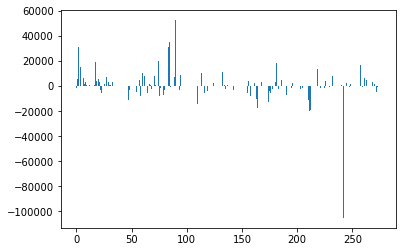

In [1567]:
#getting important features in lasso regression
from matplotlib import pyplot
# get importance
importance = lasso.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: -1669.85033
Feature: 1, Score: 5300.86749
Feature: 2, Score: 4881.03307
Feature: 3, Score: 1372.95394
Feature: 4, Score: 16756.41483
Feature: 5, Score: 5435.64246
Feature: 6, Score: 5515.05483
Feature: 7, Score: 2542.80325
Feature: 8, Score: 4616.64196
Feature: 9, Score: 1183.21642
Feature: 10, Score: 476.12980
Feature: 11, Score: -96.92454
Feature: 12, Score: 1297.91768
Feature: 13, Score: 1644.42942
Feature: 14, Score: 5699.54600
Feature: 15, Score: 5854.95901
Feature: 16, Score: 1388.30314
Feature: 17, Score: 9587.96047
Feature: 18, Score: 3923.60287
Feature: 19, Score: -649.62341
Feature: 20, Score: 5191.12600
Feature: 21, Score: 3059.87470
Feature: 22, Score: -2939.36401
Feature: 23, Score: -4959.69518
Feature: 24, Score: 8622.50471
Feature: 25, Score: 1608.75923
Feature: 26, Score: -42.97820
Feature: 27, Score: 7285.31369
Feature: 28, Score: 1535.10821
Feature: 29, Score: 3324.44489
Feature: 30, Score: 627.21085
Feature: 31, Score: 1924.98621
Feature: 32, Score

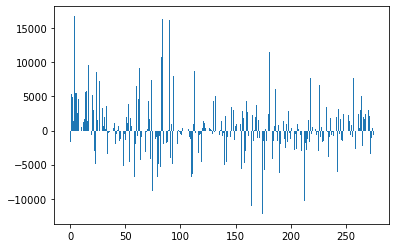

In [1568]:
#getting important features in ridge regression
from matplotlib import pyplot
# get importance
importance = ridge.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [1569]:
#capturing feature importance in dictonary
lasso_features= list(X_train.columns)
coef_dict = {}
for coef, feat in zip(lasso.coef_,lasso_features):
    coef_dict[feat] = coef

In [1570]:
coef_dict

{'LotFrontage': -1845.7317324998946,
 'LotArea': 5657.597014896464,
 'Street': 30776.795476380586,
 'Utilities': 0.0,
 'OverallQual': 14774.107082576656,
 'OverallCond': 5109.006507814041,
 'YearBuilt': 6404.532669106021,
 'YearRemodAdd': 1429.6515886377897,
 'MasVnrArea': 2741.1953545214196,
 'BsmtFinSF1': 694.4879269874396,
 'BsmtFinSF2': 269.631874110904,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 328.6698448166625,
 'CentralAir': 51.158286346157475,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.0,
 'LowQualFinSF': 405.70776729282835,
 'GrLivArea': 18694.232733952897,
 'BsmtFullBath': 3838.2850244947135,
 'BsmtHalfBath': -286.9471181111533,
 'FullBath': 5291.834837245373,
 'HalfBath': 2683.249121868339,
 'BedroomAbvGr': -3005.972438235229,
 'KitchenAbvGr': -5983.511340815872,
 'TotRmsAbvGrd': 8488.655037110728,
 'Fireplaces': 1525.5372519309185,
 'GarageYrBlt': -20.638628811215874,
 'GarageCars': 7421.202305477698,
 'GarageArea': 0.0,
 'WoodDeckSF': 3126.3772761461264,
 'OpenPorchSF': 752.3549027916397

In [1571]:
#sorting dictionary by values to highlight top features
coef_dict_sort=dict(sorted(coef_dict.items(),key= lambda x:x[1]))
coef_dict_sort

{'PoolQC_Gd': -105329.42921285715,
 'KitchenQual_Gd': -19756.92799457468,
 'KitchenQual_TA': -18992.439715551784,
 'ExterQual_TA': -17605.156839165786,
 'BldgType_Twnhs': -14554.709964773481,
 'BsmtQual_Gd': -12700.450552320846,
 'KitchenQual_Fa': -11605.96062578652,
 'MSSubClass_120': -11314.005262540346,
 'ExterQual_Gd': -10884.901909900838,
 'BldgType_TwnhsE': -9501.878688335488,
 'LotShape_IR3': -8453.231872485252,
 'Neighborhood_Edwards': -7890.053304988737,
 'Exterior2nd_Wd Shng': -7777.042156665319,
 'Neighborhood_Mitchel': -7275.662009608646,
 'BsmtFinType1_Unf': -6924.200080497235,
 'KitchenAbvGr': -5983.511340815872,
 'LotConfig_FR2': -5915.360832275387,
 'BsmtQual_TA': -5912.67666206742,
 'HouseStyle_2Story': -5565.899820017258,
 'Exterior2nd_Stucco': -5453.990573991848,
 'Exterior1st_Stucco': -5220.570827514525,
 'Neighborhood_NWAmes': -5160.390145283586,
 'MoSold_9': -4778.336595798751,
 'MSZoning_RM': -4762.286742774825,
 'RoofStyle_Gable': -4194.482345740334,
 'BsmtQual_

#### 7. changes in model if we double the alpha values for ridge and lasso


In [1572]:
#fitting ridge model for alpha=60
alpha=60
ridge=Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.31552255e+03  4.93996156e+03  2.52002048e+03  7.79375297e+02
  1.67153864e+04  5.53438232e+03  5.27587019e+03  2.86111866e+03
  5.01679242e+03  1.98572638e+03  5.93532620e+02  2.15109014e+02
  2.47430194e+03  1.05948383e+03  5.63177795e+03  4.96647598e+03
  1.28603215e+03  8.76529461e+03  3.83445137e+03 -7.04163650e+02
  4.77142598e+03  2.83096272e+03 -2.59539115e+03 -4.98170431e+03
  8.73045292e+03  2.24807998e+03 -2.64898735e+01  6.93691349e+03
  2.28713391e+03  3.40639784e+03  8.83950788e+02  1.88405436e+03
  1.95718916e+02  3.55226715e+03 -3.93081243e+03 -3.17083875e+02
 -2.45357754e+02 -7.50949932e+02  5.96080102e+02  2.23027861e+02
  8.47711335e+02 -7.59447925e+02 -2.87386357e+02  8.25618504e+01
  3.56492756e+01 -1.09996876e+03 -9.22542068e+02 -5.13505336e+03
 -3.63219261e+03 -3.56449613e+02 -9.21676578e+02  1.00461410e+03
  5.72542025e+02  3.75317654e+03 -4.16063052e+03  1.62959760e+03
  2.28071911e+02  3.07674220e+03 -4.34918670e+03 -2.44464625e+03
  4.04740058e+03 -2.14011

In [1573]:
y_pred_train= ridge.predict(X_train)
y_pred_test= ridge.predict(X_test)


metric4=[]
r2_train_lr=r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr=r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)


mse_train_lr=mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)


mse_test_lr=mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.8782204739452376
0.7997265910106344
677848552050.1069
591320431995.5614
707566338.2568966
1438735844.2714388


In [1574]:
#fitting lasso model for alpha=200
alpha=200
lasso=Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-1.57883026e+03  4.90950544e+03  0.00000000e+00  0.00000000e+00
  1.67123946e+04  5.08859326e+03  6.63871028e+03  2.26187697e+03
  3.16411856e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.54311357e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  8.69221527e+02  1.67747314e+04  4.33209778e+03 -1.11729313e+02
  4.79778963e+03  2.37243571e+03 -2.65177247e+03 -5.84291139e+03
  9.07843990e+03  1.60180751e+03 -1.66852360e+01  7.86485710e+03
  6.69086641e-01  3.10588027e+03  5.18010077e+02  1.07250226e+03
 -0.00000000e+00  3.47215010e+03 -3.29370108e+03 -2.70127329e+02
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -9.87698492e+03
 -2.72098367e+03 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.87380120e+03  0.00000000e+00
  0.00000000e+00  2.28628985e+03 -4.85173887e+03 -2.60815047e+02
  3.41132622e+03 -0.00000

In [1575]:
y_pred_train= lasso.predict(X_train)
y_pred_test= lasso.predict(X_test)


metric5=[]
r2_train_lr=r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr=r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)


mse_train_lr=mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)


mse_test_lr=mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

0.8905235135014624
0.8129929936839018
609367438523.2571
552150504248.4379
636082921.2142558
1343431883.8161504


Feature: 0, Score: -1578.83026
Feature: 1, Score: 4909.50544
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 16712.39460
Feature: 5, Score: 5088.59326
Feature: 6, Score: 6638.71028
Feature: 7, Score: 2261.87697
Feature: 8, Score: 3164.11856
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 1543.11357
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 869.22153
Feature: 17, Score: 16774.73143
Feature: 18, Score: 4332.09778
Feature: 19, Score: -111.72931
Feature: 20, Score: 4797.78963
Feature: 21, Score: 2372.43571
Feature: 22, Score: -2651.77247
Feature: 23, Score: -5842.91139
Feature: 24, Score: 9078.43990
Feature: 25, Score: 1601.80751
Feature: 26, Score: -16.68524
Feature: 27, Score: 7864.85710
Feature: 28, Score: 0.66909
Feature: 29, Score: 3105.88027
Feature: 30, Score: 518.01008
Feature: 31, Score: 1072.50226
Feature: 32, Score: -0.00000
Feature: 33, S

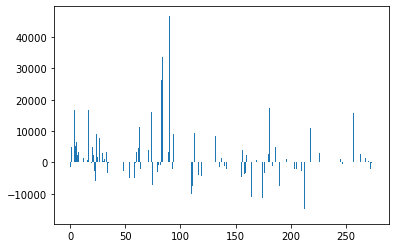

In [1576]:
# finding the most important feaures
#getting important features in lasso regression
from matplotlib import pyplot
# get importance
importance = lasso.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [1577]:
#capturing feature importance in dictonary
lasso_features= list(X_train.columns)
coef_dict = {}
for coef, feat in zip(lasso.coef_,lasso_features):
    coef_dict[feat] = coef

In [1578]:
#sorting dictionary by values to highlight top features
coef_dict_sort=dict(sorted(coef_dict.items(),key= lambda x:x[1]))
coef_dict_sort

{'KitchenQual_Gd': -16422.324005392205,
 'KitchenQual_TA': -14971.013489144765,
 'BsmtQual_Gd': -11254.326744412941,
 'ExterQual_TA': -11069.550981069255,
 'BldgType_Twnhs': -10056.332045868954,
 'MSSubClass_120': -9876.984916303882,
 'BldgType_TwnhsE': -7569.5808759907695,
 'BsmtFinType1_Unf': -7522.47800430862,
 'Neighborhood_Edwards': -7145.87026948313,
 'KitchenAbvGr': -5842.911389958401,
 'MSZoning_RM': -4873.801196894698,
 'LotShape_IR3': -4851.738867316803,
 'Exterior2nd_Stucco': -4570.004727819182,
 'RoofStyle_Gable': -4490.401840475851,
 'HouseStyle_2Story': -3974.7876205103375,
 'ExterQual_Gd': -3681.4450365746607,
 'Exterior2nd_Wd Shng': -3632.772954647456,
 'BsmtQual_TA': -3383.997398081156,
 'PoolArea': -3293.7010785923326,
 'MasVnrType_BrkFace': -3284.306263261988,
 'Neighborhood_Mitchel': -2964.7705611542265,
 'MSSubClass_160': -2720.983669694191,
 'BedroomAbvGr': -2651.772473977177,
 'KitchenQual_Fa': -2627.593227308282,
 'Exterior1st_Wd Sdng': -2257.825231466384,
 'Lot

Feature: 0, Score: -1315.52255
Feature: 1, Score: 4939.96156
Feature: 2, Score: 2520.02048
Feature: 3, Score: 779.37530
Feature: 4, Score: 16715.38642
Feature: 5, Score: 5534.38232
Feature: 6, Score: 5275.87019
Feature: 7, Score: 2861.11866
Feature: 8, Score: 5016.79242
Feature: 9, Score: 1985.72638
Feature: 10, Score: 593.53262
Feature: 11, Score: 215.10901
Feature: 12, Score: 2474.30194
Feature: 13, Score: 1059.48383
Feature: 14, Score: 5631.77795
Feature: 15, Score: 4966.47598
Feature: 16, Score: 1286.03215
Feature: 17, Score: 8765.29461
Feature: 18, Score: 3834.45137
Feature: 19, Score: -704.16365
Feature: 20, Score: 4771.42598
Feature: 21, Score: 2830.96272
Feature: 22, Score: -2595.39115
Feature: 23, Score: -4981.70431
Feature: 24, Score: 8730.45292
Feature: 25, Score: 2248.07998
Feature: 26, Score: -26.48987
Feature: 27, Score: 6936.91349
Feature: 28, Score: 2287.13391
Feature: 29, Score: 3406.39784
Feature: 30, Score: 883.95079
Feature: 31, Score: 1884.05436
Feature: 32, Score:

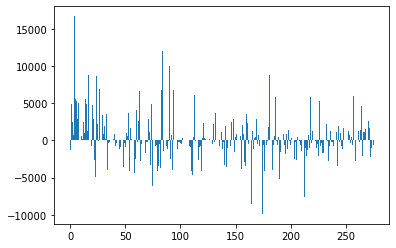

In [1579]:
# finding the most important feaures
#getting important features in ridge regression
from matplotlib import pyplot
# get importance
importance = ridge.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [1580]:
#capturing feature importance in dictonary
ridge_features= list(X_train.columns)
coef_dict = {}
for coef, feat in zip(ridge.coef_,ridge_features):
    coef_dict[feat] = coef

In [1583]:
#sorting dictionary by values to highlight top features
coef_dict_sort=dict(sorted(coef_dict.items(),key= lambda x:x[1]))
coef_dict_sort

{'BsmtQual_Gd': -9882.735571498944,
 'ExterQual_TA': -8549.86168805801,
 'KitchenQual_Gd': -8510.489621100463,
 'KitchenQual_TA': -7638.604534552399,
 'Neighborhood_Edwards': -6097.4562388934755,
 'BsmtFinType1_Unf': -5187.1426088882245,
 'MSSubClass_120': -5135.053355838843,
 'KitchenAbvGr': -4981.70431382214,
 'BldgType_TwnhsE': -4681.25506212845,
 'LotShape_IR3': -4349.186700701353,
 'BldgType_Twnhs': -4161.285765209735,
 'MSZoning_RM': -4160.630521522181,
 'Neighborhood_Mitchel': -4115.773389739493,
 'Neighborhood_Gilbert': -4079.108807952385,
 'RoofStyle_Gable': -4071.369491330932,
 'BsmtQual_TA': -4062.544077279984,
 'Condition1_Feedr': -4027.38082920231,
 'BsmtExposure_No': -3949.133517693211,
 'PoolArea': -3930.8124331395543,
 'Exterior2nd_Stucco': -3843.3953076245584,
 'Neighborhood_NWAmes': -3693.560946832474,
 'MSSubClass_160': -3632.192609915105,
 'Exterior1st_Wd Sdng': -3541.3975501660616,
 'PoolQC_Gd': -3435.169349600232,
 'MasVnrType_BrkFace': -3413.5220794474235,
 'Neig